# Exploratory Data Analysis (EDA)
## <a href="#I">I Univariate plots</a>
### <a href="#I.1">I.1 Histogram</a>
### <a href="#I.2">I.2 Kerner Density Estimate (KDE)</a>
## <a href="#II">II Bivariate Plots</a>
### <a href="#II.1">II.1 Scatterplot</a>
### <a href="#II.2">II.2 Lineplot</a>
### <a href="#II.3">II.3 Jointplot</a>
### <a href="#II.4">II.4 Pairplot</a>
## <a href="#III">III Categorical data types</a>
### <a href="#III.1">III.1 Scatterplot</a>
### <a href="#III.2">III.2 Boxplot</a>
### <a href="#III.3">III.3 Violin Plot</a>
### <a href="#III.4">III.4 Point Plot</a>
### <a href="#III.5">III.5 Barplot</a>
## <a href="#IV">IV Linear Regression Models Plots</a>

# Exploratory Data Analysis (EDA)

__Exploratory Data Analysis__ (__EDA__)refers to the critical process of performing initial investigations on data so as to discover patterns, to detect outliers and anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.<br>

Data visualization is an important part of EDA and, more generaly speaking, of any data analysis.
It helps us to recognize relations between variables and also to find which variables are significant or which variable can affect the predicted variable.

We are going to learn how to visualize different types of data, and what we can infer from that plot, and when to use them.
We will mainly use Seaborn (a library built on Matplotlib), Pandas and Matplotlib. 
Seaborn is easy to use and can work easily with Numpy and pandas data structures.

We’ll be using inbuilt dataset provided by seaborn name __tips__.

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # default is 'last'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
tips = sns.load_dataset("tips")
tips.head()
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can see that __sex__, __smoker__, __day__ and __time__ are __categorical data__. And __total_bill__, __tip__, and __size__ are numerical data (the method __describe()__ provide several statistical information about the numerical features).

<a id="I"></a>
## I Univariate plots

These plots are based on a single variable and show the frequency of uniques values of a given variable.

<a id="I.1"></a>
### I.1 Histogram

With the help of this plot, we can see that most of the tips are between 2 and 4. We can also see that the tips greater than 7 are very rare, may be they could be considered as outliers ?

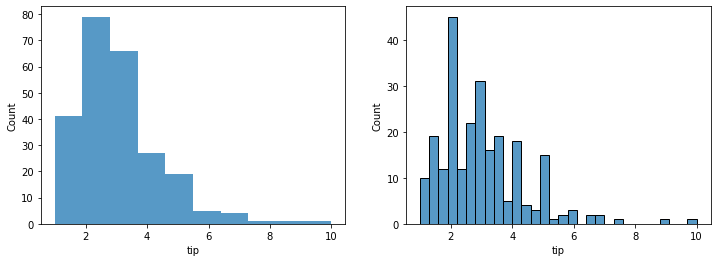

In [3]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# sns.distplot(tips['tip'], kde=False, bins=10)
sns.histplot(tips['tip'], kde=False, bins=10,linewidth=0)
# Larger the bins value more accurate the result:
plt.subplot(1,2,2)
#sns.distplot(tips['tip'], kde=False, bins=30)
sns.histplot(tips['tip'], kde=False, bins=30,linewidth=1);

You can also directly makes use of the __hist()__ DataFrame method:

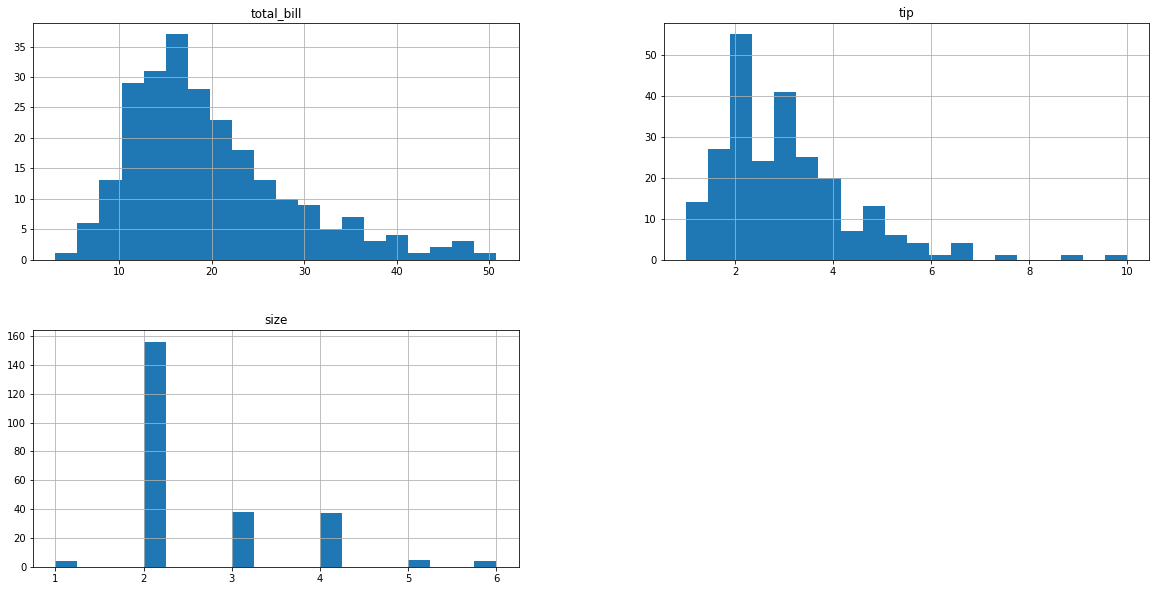

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
tips.hist(bins=20);


<a id="I.2"></a>
### I.2 Kernel Density Estimate (KDE)

__KDE__ is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the __distribution__ of the variable.

<AxesSubplot:xlabel='tip', ylabel='Density'>

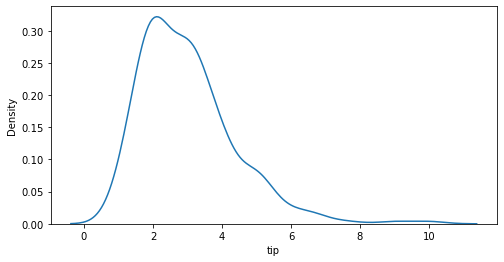

In [40]:
plt.rcParams["figure.figsize"] = (8,4)
#sns.distplot(tips['tip'],hist=False, bins=10)
sns.kdeplot(tips['tip'])

You can also directly makes use of the __plot()__ DataFrame method:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

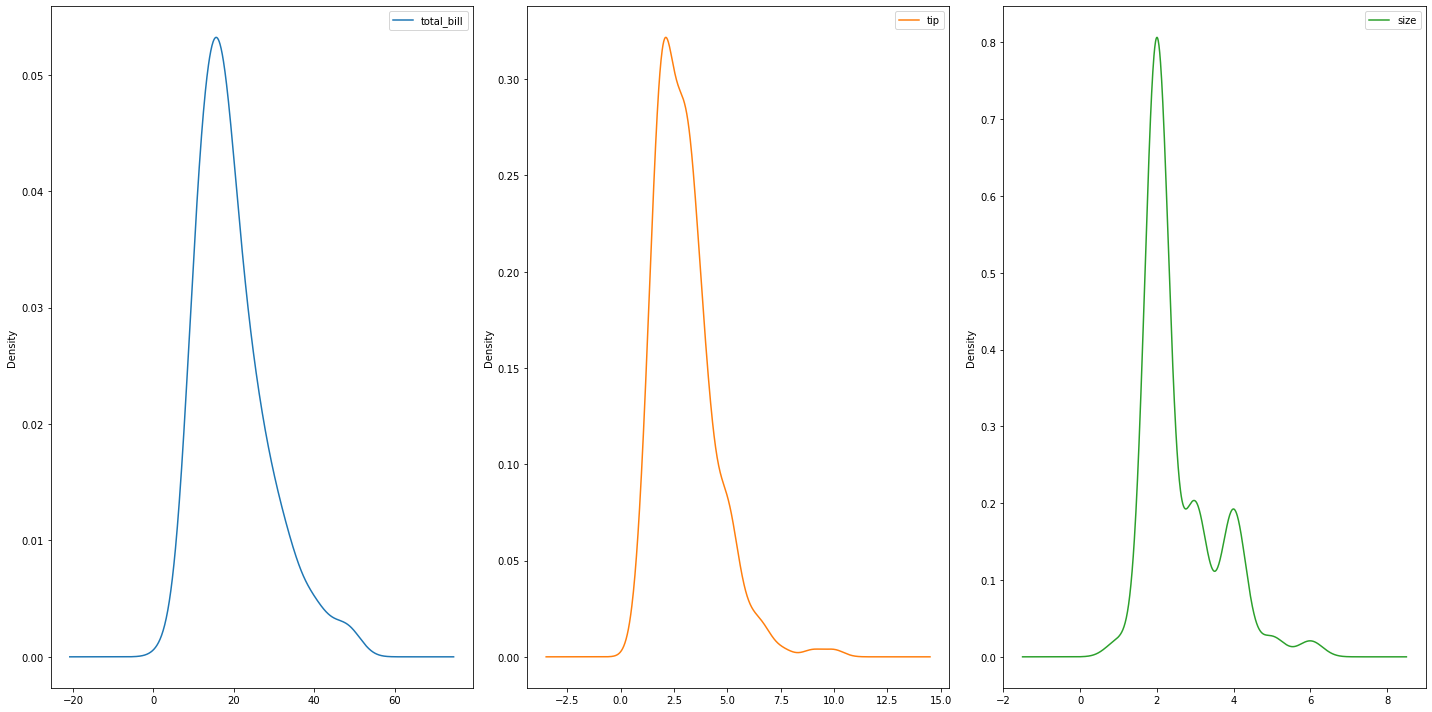

In [8]:
tips.plot(kind='density', subplots=True, layout=(1,3), sharex=False)
plt.tight_layout()


You can combine the 2 plots in one:
    

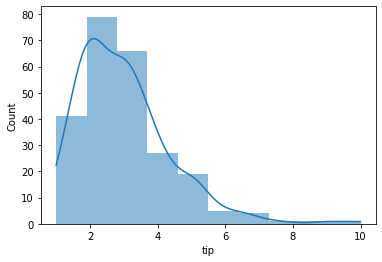

In [7]:
#sns.distplot(tips['tip'],hist=True, bins=20)
sns.histplot(tips['tip'], kde=True, bins=10,linewidth=0);
#sns.displot(tips, x="tip", kind="kde")
#sns.displot(tips, x="tip", kind="kde", bw_adjust=.5)

<a id="II"></a>
## II Bivariate Plots

This type of plots is used when you need to find a relation between two variables and to find how the value of one variable changes the value of another variable. 

Different types of plots are used based on the data type of the variable.
<a id="II.1"></a>
### II.1 Scatterplot


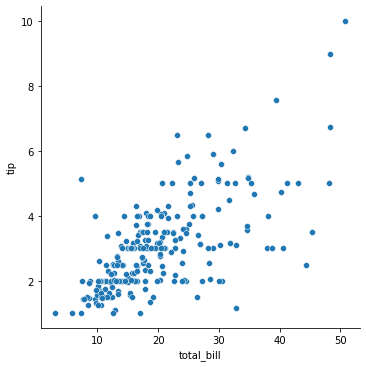

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips);

Default plot type of __relplot()__ is __scatterplot__ (it could also plot a __lineplot__).<br> 
It shows the relationship between two variables: it helps you find the correlation between two variables.
In the above example we can see that if _total_bill_ is between _10–20_ than the _tip_ will be mostly above _2_.<br>

We can represent a third variable in a __scatterplot__ using different colors (__hue__) or shape of dots (__style__).


<Figure size 432x288 with 0 Axes>

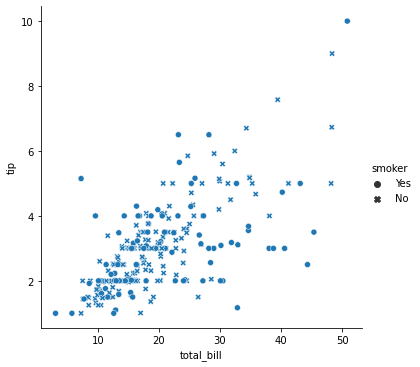

<Figure size 432x288 with 0 Axes>

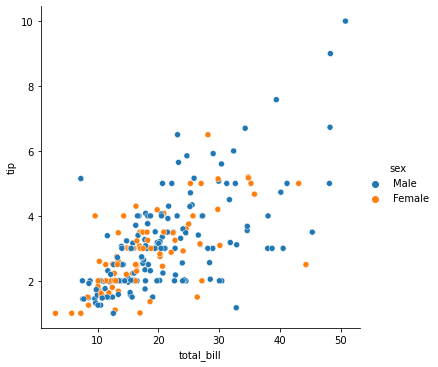

In [9]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips)
plt.figure()
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

<a id="II.2"></a>
### II.2 Lineplot

This plot is similar to the scatterplot but instead of dots, it displays the line joining all the dots by arranging the variable value represented on the x-axis.

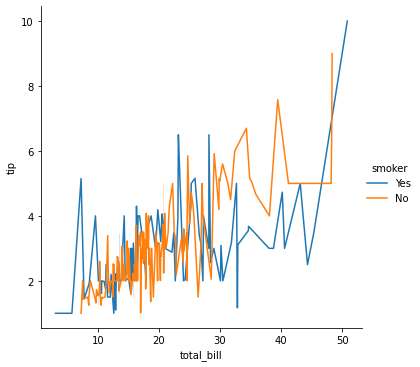

In [30]:
sns.relplot(kind='line', x="total_bill", y="tip", hue="smoker", data=tips)

<a id="II.3"></a>
### II.3 Jointplot

A Joint-Plot takes two variables and creates Histogram and Scatterplot together. 

Lets create a jointplot of __total_bill__ and __tip__ variable from the tips dataset. Normally the tip amount in any restaurant is dependant on the __total bill__ size.

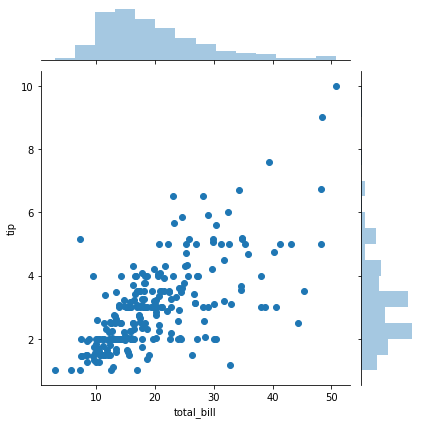

In [101]:
sns.jointplot(x = "total_bill", y = "tip", data = tips)

As mentioned above, the scatterplot appears to be showing a correlation between the total bill & the tip amount. <br>
On the top of it, we can see the histogram of the respective variables.

There are several __kind__ values that can be provided to __jointplot()__ to create different plots: "__scatter__" (the default), "__reg__", "__resid__", "__kde__" and "__hex__".

With the parameter __kind ="hex"__, __jointplot()__ will plot a "__Hexbin__" plot.<br>
A "hexbin" plot is the bivariate analogue of a histogram: it shows the counts of observations that fall within hexagonal bins.<br>
The dark colour of the hexagons suggest high density of the data-points where the lighter colour signifies the lesser points.

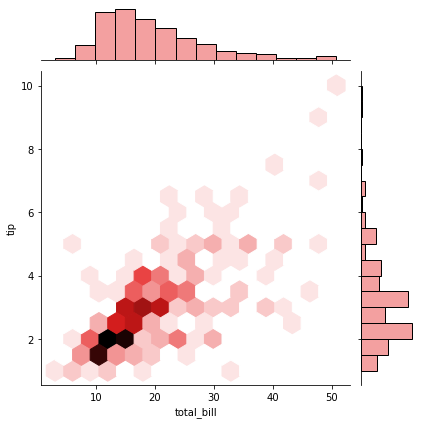

In [31]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind ="hex", color="lightcoral")

With __kind="kde"__ we obtain a Contour Plot: it is a way to show a three-dimensional surface on a two-dimensional plane. <br>It graphs two predictor variables X,Y on the y-axis and a response variable Z as contours.

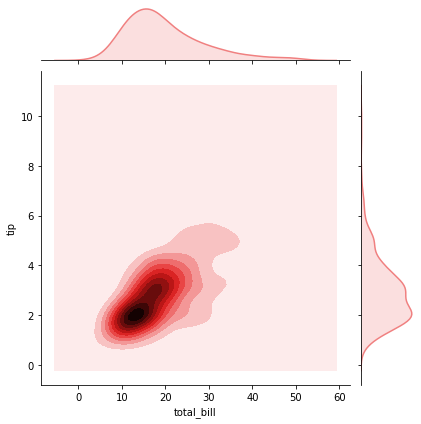

In [103]:
sns.jointplot(x = tips["total_bill"], y = tips["tip"],kind = "kde", color="lightcoral")

<a id="II.4"></a>
### II.4 Pairplot

A __Pairplot__ essentially plots pair wise relationship between all ordinal variables of a DataFrame. <br>
It supports "__hue__" as coloring the plot using categorical variables.

The diagonal part shows the distplot or histogram with kernel density estimation. <br>
The upper and lower part of the Pairplot shows the scatterplot. <br>
The __hue__ colours the plot using categorical columns (here the gender).<br>
__palette = "muted"__ is a type of color combination used to color the plot (many other do exist: Set1, Set2, Set3, deep, pastel, bright, dark, Blues, Greens, ...).

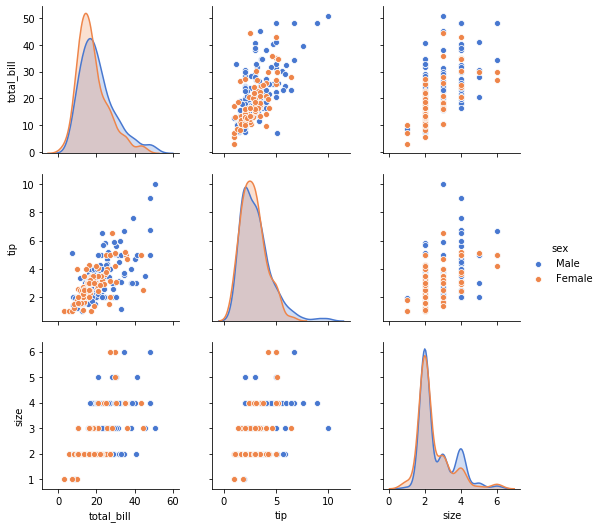

In [104]:
sns.pairplot(tips, hue = "sex", palette="muted")

Pandas offer something similar via the __scatter_matrix()__ function:

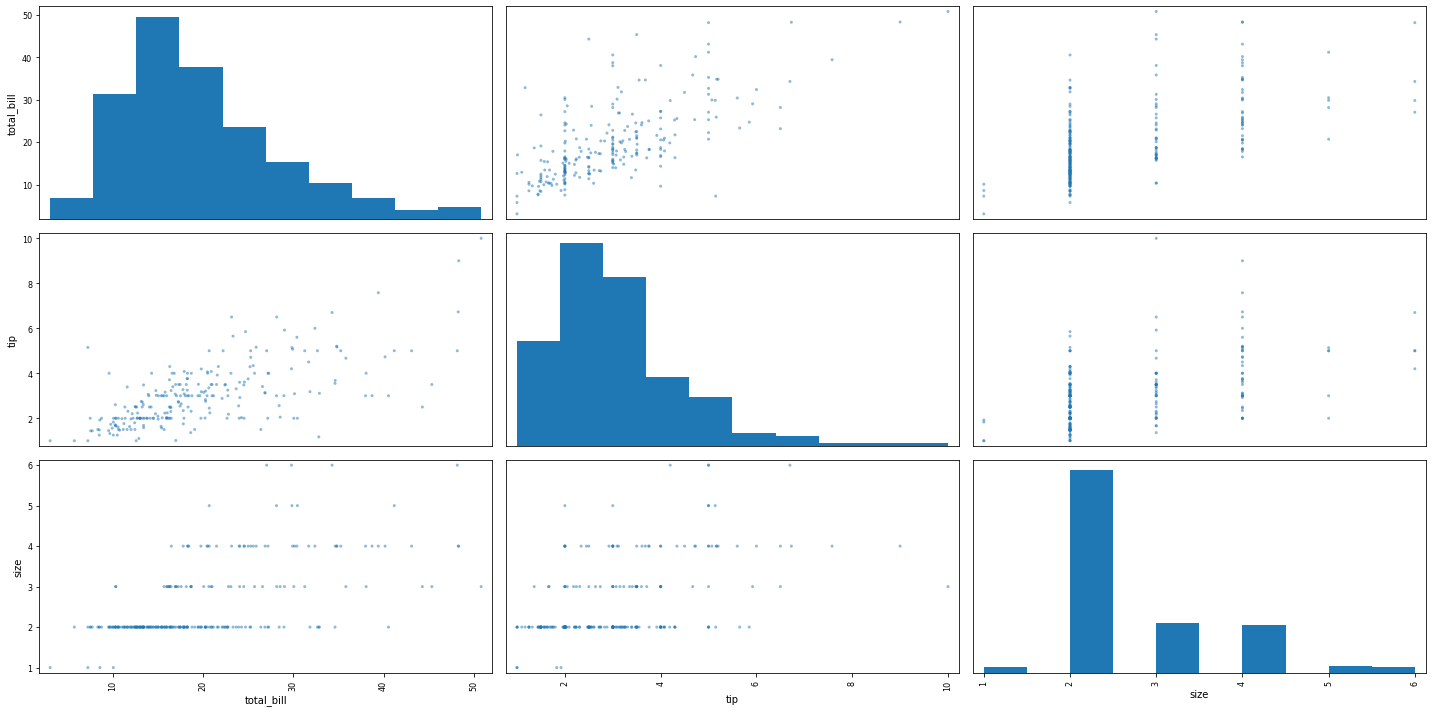

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(tips)
plt.tight_layout();

<a id="III"></a>
## III Categorical data types

<a id="III.1"></a>
### III.1 Scatterplot

To show the relationship between two categorical variables we can use __catplot()__.<br>
__catplot()__ works in a way similar to __relplot()__ but it is targeted to categorical variables.<br>
Default plot type of __catplot()__ is __scatter__, but it could also be of other kinds: "point", "bar", "strip", "swarm", "box", "violin", or "boxen".


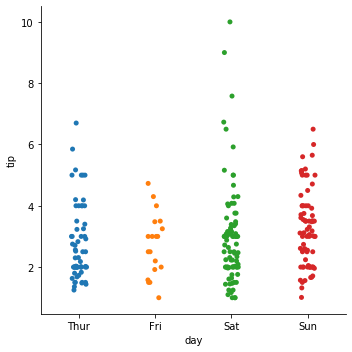

In [24]:
sns.catplot(x="day", y="tip", data=tips)

We can see that most of the tips are concentrated between 2 and 4 irrespective of the wee day.<br>
A third variable can be used using attribute __hue__ (only).
The categories to be represented on the x-axis are sorted as per the pandas categories, you can change the order using the __order__ attribute.

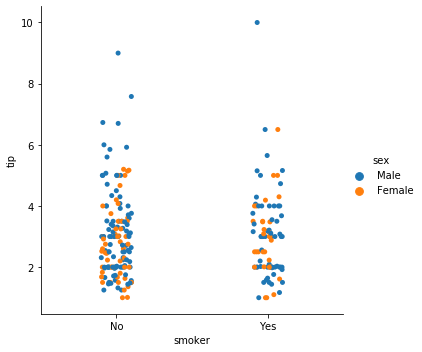

In [107]:
sns.catplot(x="smoker", y="tip", hue="sex", order=["No", "Yes"], data=tips)

<a id="III.2"></a>
### III.2 Boxplot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. <br>
The boxplot may detect and display some outliers based on an inter-quartile function.

<img src="nbimages/boxplot.png" alt="BoxPlot" title="BoxPlot" width=200 height=400 />

Here are the different elements of a box plot:

1. Bottom black horizontal line of blue box plot is minimum value
2. First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
3. Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
4. Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
5. Top black horizontal line of rectangle shape of blue box plot is maximum value.
6. Small diamond shape of blue box plot is outlier data or erroneous data.

__Note__: if outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

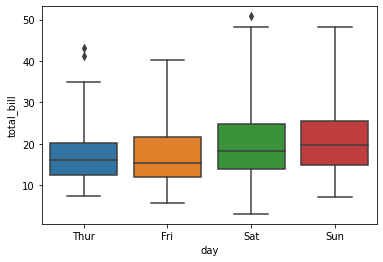

In [6]:
# catplot() with kind="box" is used here to plot a box plot
#sns.catplot(x="day", y="total_bill", kind="box", data=tips)
sns.boxplot(x="day", y="total_bill", data=tips, whis=2.2)

We can infer from the given graph that the amount of __total_bill__ is higher on weekends than weekdays.<br>
Furthermore, several outliers are present in the dataset.

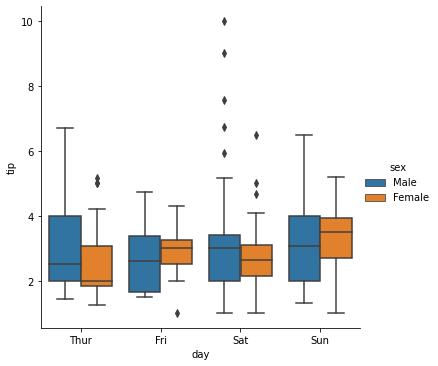

In [7]:
# A  box plot using a third variable
sns.catplot(x="day", y="tip", hue="sex", kind="box", data=tips)

Here we can see that the average amount of total_bill for females is always less than the males. So, we can say that __total_bill__ amount is dependent on __sex__.

<a id="III.3"></a>
### III.3 Violin Plot

This plot is used to visualize the distribution of the data and its probability density.<br>
This chart is a combination of a Box Plot and a Density Plot.

<img src="nbimages/violin.png" alt="ViolinPlot" title="ViolinPlot" width=300 height=400 />


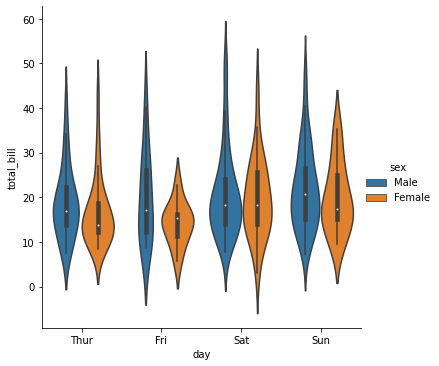

In [8]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", data=tips)

On Friday we can see that female’s __total_bill__ is much lower than male’s total_bill.

<a id="III.4"></a>
### III.4 Point plot

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. <br>

Point plot shows only mean values and error rate surrounding those mean values. This kind of plot could help to find changes in a variable based on different categories.

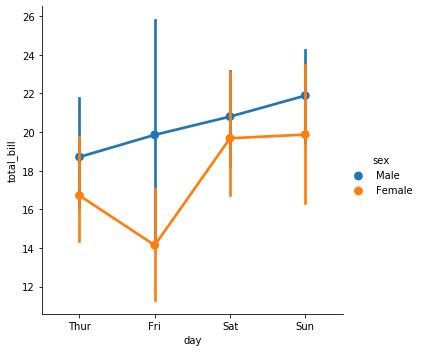

In [111]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=tips)


With this plot we can see changes in __total_bill__ according to days. The __total_bill__ is rising for male’s as the weekend arises while it decreases on _Friday_ for females and jumps on _Saturday_ and remains mostly constant on _Sunday_.

<a id="III.5"></a>
### III.5 Barplot

Barplots are meant for plotting categorical columns vs numerical columns. 
It creates bar in visualisation.<br>
Lets create a barplot of "total_bill" with "day" to find if there is more bill In Weekend or Weekdays.

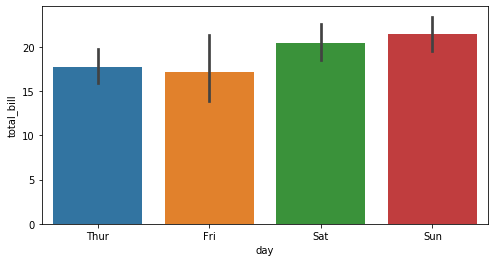

In [112]:
sns.barplot(x ="day" , y ="total_bill" , data=tips)

<a id="IV"></a>
## IV  Linear Regression Models Plots

__sns.lmplot()__ is a plot that fits the regression line to the dataset showing as scatterplots. <br>
It follows the ordinary least square method and the line represents the best fit line.<br>

The following code draws a scatterplot of two variables, __total_bill__ and __tip__, and then fit the regression model __tip__ ~ __total_bill__ and plot the resulting regression line and a 95% confidence interval for that regression for the different __days__ as shown in the plot legend.

__Note__: __sns.regplot()__ is similar to __sns.lmplot()__ but it possesses a subset of __lmplot()’s__ features (for instance, it does accept the __hue__ parameter).

<Figure size 576x288 with 0 Axes>

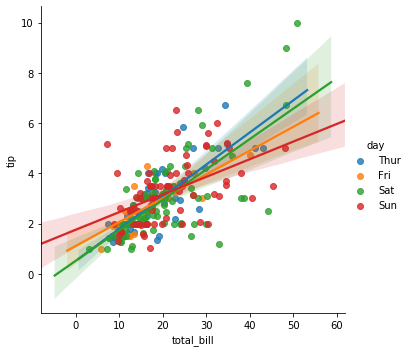

<Figure size 576x288 with 0 Axes>

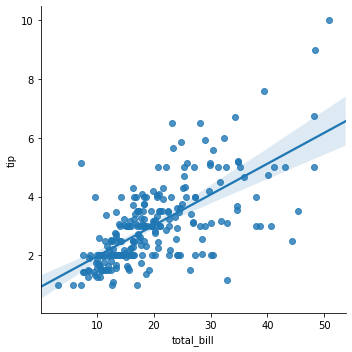

In [113]:
sns.lmplot(x = "total_bill", y = "tip", hue="day", data = tips)
plt.figure()
sns.lmplot(x = "total_bill", y = "tip", data = tips)